applying pivot_table() on IPL dataset

In [ ]:
import pandas as pd
match = pd.read_csv(r"D:\delivery-matches\matches.csv")
match.head()

In [ ]:
delivery= pd.read_csv(r"D:\delivery-matches\deliveries.csv")
delivery.head()

problem :

teamname in coloumns and overs 1-20 in rows 

values will be : how many 6's each team has scored

solved : my logic

In [ ]:
merged= delivery.merge(match , left_on='match_id' , right_on='id')    #merged on basis of id column in both
merged.head()

In [ ]:
merged.sort_values('match_id').head()
#match_id is unique per match 

taking only those rows where batsman hitted 6

In [ ]:
merged_6 = merged[merged['batsman_runs']==6]
merged_6.head()

taking overs <= 20

In [ ]:
merged_6_20= merged_6[ merged_6['over'] < 21]
merged_6_20

In [99]:
grouped = merged_6_20.groupby( ['season' , 'batting_team' ,'over'])

#in particular season, number of 6's batted by each team 
score_six = grouped.size().reset_index(name='total_six')    # creates new column 'total_six'
# size() counts total rows  i,e total 6 hitted by particular team in this dataset

score_six

,season,batting_team,over,total_six
0,2008,Chennai Super Kings,2,1
1,2008,Chennai Super Kings,3,2
2,2008,Chennai Super Kings,4,2
3,2008,Chennai Super Kings,5,1
4,2008,Chennai Super Kings,6,4
...,...,...,...,...
1561,2017,Sunrisers Hyderabad,16,1
1562,2017,Sunrisers Hyderabad,17,3
1563,2017,Sunrisers Hyderabad,18,5
1564,2017,Sunrisers Hyderabad,19,5


In [ ]:
final_six = score_six.pivot_table(index=['season', 'over'] , columns=['batting_team'] ,values = 'total_six')
final_six

plotting heat map

<Axes: xlabel='batting_team', ylabel='season-over'>

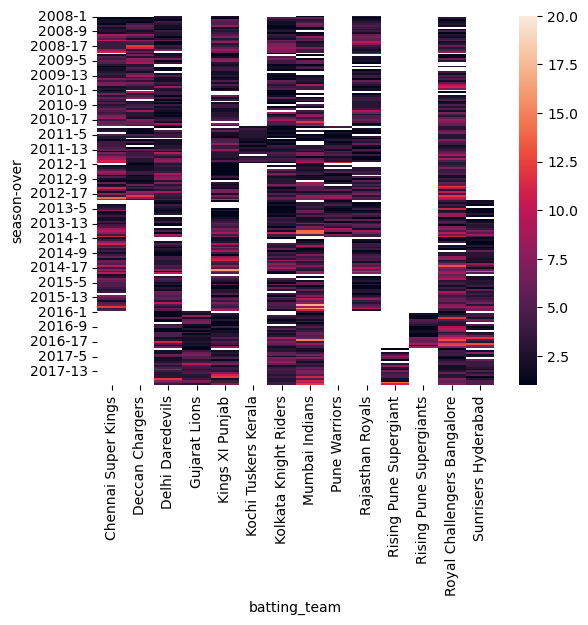

In [101]:
import seaborn as sns
sns.heatmap(final_six)